In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import InceptionV3, VGG16, InceptionResNetV2, VGG19, ResNet101, ResNet101V2, ResNet152, ResNet152V2, ResNet50, ResNet50V2, Xception, MobileNet, MobileNetV2
from time import perf_counter 
import os
import cv2

In [ ]:
os.environ['KAGGLE_USERNAME']="alkadeep"
os.environ['KAGGLE_KEY']="bdf093bbaf48eb9c99cb787a72e46d7e"

In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 94% 113M/121M [00:00<00:00, 142MB/s] 
100% 121M/121M [00:00<00:00, 137MB/s]


In [ ]:
!unzip face-expression-recognition-dataset.zip

In [ ]:
batch_size = 100
img_height = 224
img_width = 224

In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/images/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 28821 files belonging to 7 classes.


In [ ]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/images/validation',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 7066 files belonging to 7 classes.


In [ ]:
model1= Sequential([
                   Conv2D(32, 3, input_shape=(256,256,3), activation='relu', padding="same"),
                   MaxPooling2D(),
                   Conv2D(64, 3, activation='relu', padding="same"),
                   Conv2D(64, 3, activation='relu', padding="same"),
                   MaxPooling2D(),
                   Conv2D(128, 3, activation='relu',padding="same" ),
                   Conv2D(128, 3, activation='relu', padding="same"),
                   MaxPooling2D(),
                   Conv2D(256, 3, activation='relu', padding="same"),
                   Conv2D(256, 3, activation='relu', padding="same"),
                   MaxPooling2D(),
                   Conv2D(512, 3, activation='relu', padding="same"),
                   Flatten(),
                   Dense(512, activation='relu'),
                   Dense(256, activation='relu'),
                   Dense(64, activation='relu'),
                   Dense(7, activation='softmax')                
])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 128)      

In [ ]:
model1.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
checkpoint= tf.keras.callbacks.ModelCheckpoint('model_checkpoint.h5', save_best_only=True, verbose=1)

In [ ]:
callbacks= [tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss'),
            tf.keras.callbacks.TensorBoard(log_dir='Logs')]

In [ ]:
model1.fit(training_ds, validation_data=validation_ds, epochs=20, callbacks=[callbacks])

Epoch 1/20
289/289 [==============================] - 145s 500ms/step - loss: 0.2260 - accuracy: 0.9237 - val_loss: 3.6204 - val_accuracy: 0.4628
Epoch 2/20
289/289 [==============================] - 145s 498ms/step - loss: 0.1833 - accuracy: 0.9394 - val_loss: 4.1657 - val_accuracy: 0.4755
Epoch 3/20
289/289 [==============================] - 145s 498ms/step - loss: 0.1607 - accuracy: 0.9493 - val_loss: 3.7154 - val_accuracy: 0.4713
Epoch 4/20
289/289 [==============================] - 145s 498ms/step - loss: 0.1406 - accuracy: 0.9544 - val_loss: 4.3628 - val_accuracy: 0.4652
Epoch 5/20
289/289 [==============================] - 144s 497ms/step - loss: 0.1241 - accuracy: 0.9610 - val_loss: 4.6966 - val_accuracy: 0.4703
Epoch 6/20
289/289 [==============================] - 144s 497ms/step - loss: 0.1074 - accuracy: 0.9678 - val_loss: 5.0960 - val_accuracy: 0.4683
Epoch 7/20
289/289 [==============================] - 142s 490ms/step - loss: 0.0905 - accuracy: 0.9734 - val_loss: 4.4321 -

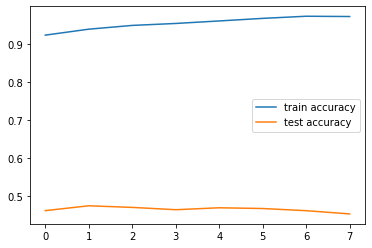

In [ ]:
plt.plot(model1.history.history['accuracy'], label='train accuracy')
plt.plot(model1.history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

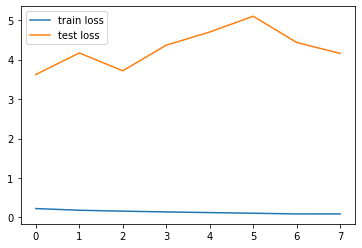

In [ ]:
plt.plot(model1.history.history['loss'], label='train loss')
plt.plot(model1.history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

In [ ]:
vgg16= VGG16(include_top=False, input_shape=(224,224,3), classes=7)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
X=vgg16.output
X=Flatten()(X)
X=Dense(1024, activation='relu')(X)
X=Dropout(0.3)(X)
X=Dense(512, activation='relu')(X)
X=Dropout(0.2)(X)
X=Dense(256, activation='relu')(X)
output=Dense(7, activation='softmax')(X)

In [ ]:
model2=Model(inputs=vgg16.input, outputs=output)

In [ ]:
model2.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
checkpoint= tf.keras.callbacks.ModelCheckpoint('model_checkpoint.h5', save_best_only=True, verbose=1)

In [ ]:
callbacks= [tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss'),
            tf.keras.callbacks.TensorBoard(log_dir='Logs2')]

In [ ]:
model2.fit(training_ds, validation_data=validation_ds, batch_size=16, epochs=20, callbacks=[callbacks])

Epoch 1/20
289/289 [==============================] - 458s 2s/step - loss: 2.0222 - accuracy: 0.2459 - val_loss: 1.7926 - val_accuracy: 0.2608
Epoch 2/20
289/289 [==============================] - 428s 1s/step - loss: 1.7909 - accuracy: 0.2598 - val_loss: 1.7776 - val_accuracy: 0.2637
Epoch 3/20
289/289 [==============================] - 429s 1s/step - loss: 1.7801 - accuracy: 0.2662 - val_loss: 1.7321 - val_accuracy: 0.3029
Epoch 4/20
289/289 [==============================] - 431s 1s/step - loss: 1.6798 - accuracy: 0.3336 - val_loss: 1.5809 - val_accuracy: 0.3770
Epoch 5/20
289/289 [==============================] - 431s 1s/step - loss: 1.5433 - accuracy: 0.3909 - val_loss: 1.4867 - val_accuracy: 0.4171
Epoch 6/20
289/289 [==============================] - 431s 1s/step - loss: 1.4491 - accuracy: 0.4330 - val_loss: 1.3794 - val_accuracy: 0.4674
Epoch 7/20
289/289 [==============================] - 431s 1s/step - loss: 1.3723 - accuracy: 0.4658 - val_loss: 1.3642 - val_accuracy: 0.4683

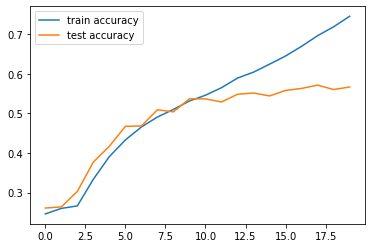

In [ ]:
plt.plot(model2.history.history['accuracy'], label='train accuracy')
plt.plot(model2.history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

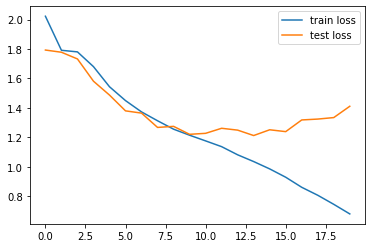

In [ ]:
plt.plot(model2.history.history['loss'], label='train loss')
plt.plot(model2.history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

In [ ]:
resnet50= ResNet50(include_top=False, input_shape=(224,224,3), classes=7)

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet50.summary()

In [ ]:
X=resnet50.output
X=Flatten()(X)
X=Dense(1024, activation='relu')(X)
X=Dropout(0.3)(X)
X=Dense(512, activation='relu')(X)
X=Dropout(0.2)(X)
X=Dense(256, activation='relu')(X)
output=Dense(7, activation='softmax')(X)

In [ ]:
model3=Model(inputs=resnet50.input, outputs=output)

In [ ]:
model3.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
checkpoint= tf.keras.callbacks.ModelCheckpoint('model_checkpoint.h5', save_best_only=True, verbose=1)

In [ ]:
callbacks= [tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss'),
            tf.keras.callbacks.TensorBoard(log_dir='Logs3')]

In [ ]:
model3.fit(training_ds, validation_data=validation_ds, batch_size=16, epochs=20, callbacks=[callbacks])

Epoch 1/20
289/289 [==============================] - 336s 1s/step - loss: 1.8389 - accuracy: 0.4109 - val_loss: 1.8668 - val_accuracy: 0.4512
Epoch 2/20
289/289 [==============================] - 316s 1s/step - loss: 1.1975 - accuracy: 0.5479 - val_loss: 1.3014 - val_accuracy: 0.5065
Epoch 3/20
289/289 [==============================] - 316s 1s/step - loss: 1.0767 - accuracy: 0.5926 - val_loss: 1.1983 - val_accuracy: 0.5450
Epoch 4/20
289/289 [==============================] - 315s 1s/step - loss: 1.0200 - accuracy: 0.6163 - val_loss: 2.7203 - val_accuracy: 0.4001
Epoch 5/20
289/289 [==============================] - 315s 1s/step - loss: 1.0056 - accuracy: 0.6220 - val_loss: 1.6733 - val_accuracy: 0.4166
Epoch 6/20
289/289 [==============================] - 315s 1s/step - loss: 0.9096 - accuracy: 0.6590 - val_loss: 3.2816 - val_accuracy: 0.4733
Epoch 7/20
289/289 [==============================] - 315s 1s/step - loss: 0.8126 - accuracy: 0.6969 - val_loss: 1.2466 - val_accuracy: 0.5698

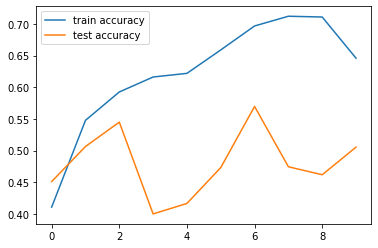

In [ ]:
plt.plot(model3.history.history['accuracy'], label='train accuracy')
plt.plot(model3.history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

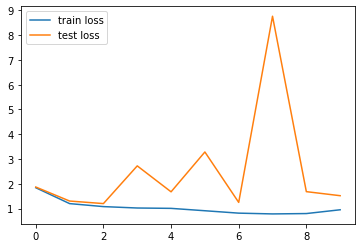

In [ ]:
plt.plot(model3.history.history['loss'], label='train loss')
plt.plot(model3.history.history['val_loss'], label='test loss')
plt.legend()
plt.show()